# Overfitting and underfitting

Predictive models can suffer from two negative phenomena, both of them lead to less accurate predictions:

- **Overfitting**: the model is so complex that captures spurious patterns that won't recur in the overal population;

- **Underfitting**: the model is so simple that fails to capture relevant patterns.

The image and accompanying text below are transcribed from this [paper](https://www.nature.com/articles/nmeth.3968).

![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fnmeth.3968/MediaObjects/41592_2016_Article_BFnmeth3968_Fig1_HTML.jpg?as=webp)

* (a) When model complexity increases, generally bias decreases and variance increases. The choice of model complexity is informed by the goal of minimizing the total error (dotted vertical line).

* (b) Polynomial fits to data simulated from a third-order polynomial underlying a model with normally distributed noise. The fits shown exemplify underfitting (gray diagonal line, linear fit), reasonable fitting (black curve, third-order polynomial) and overfitting (dashed curve, fifth-order polynomial). There is a large difference (red dotted line) in Y prediction at X = 0.9 (orange circle) between the reasonable and overfitted models.

* (c) Two-class classification (open and solid circles) with underfitted (gray diagonal line), reasonable (black curve) and overfitted (dashed curve) decision boundaries. The overfit is influenced by an outlier (arrow) and would classify the new point (orange circle) as solid, which would probably be an error.

Underfitting and overfitting are general problems that can appear in any learning algorithm. In this notebook, we will study how to construct polynomial features, which is one possible solution to **underfitting** in the context of linear models, such as OLS and linear regression. Later in the course, we will describe some techniques to tackle overfitting.


# Polynomial Features

One downside of linear models, such as OLS and logistic regression, is that it can only learn linear relationships between the predictive features and the target. For example, in the context of a regression task using the dataset below, it seems to exist a non-linear relationship between the `Area` of a house and its `Price`.

![alt text](https://qph.fs.quoracdn.net/main-qimg-b6935fdb7f8a68706698ac1b29ed22df)

In cases like the one described above, it may be useful to define additional of predictive features to allow for more complex models to be learned.

The class[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) of Scikit-Learn can be used to create derived features for some combinations of the original features in a dataset. This is a way to perform *feature engineering*. From the Wikipedia:

> Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

As an example, consider a dataset with only two predictive features, $x_1$ and $x_2$. We can create a linear regression model that considers a third feature, and this new attribute corresponds to the *multiplicative interaction* between $x_1$ and $x_2$:

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2}
$$

In the above expression, $x_1$ and $x_2$ are the values ​​of the two original features, and $x_1 \times x_2$ represents the value of a new feature that considers the interaction between $x_1$ and $x_2$. We can use model selection strategies to identify the combination of features and terms of interaction that produce the best model.

After creating these new features, a linear regression model can be adjusted to the new data set.

Adding interaction features has the potential to generate more flexible models. However, the resulting models are also more susceptible to **overfitting**, which is the undesirable fenomena in which the model becomes excedingly fit to the training data and does not generalize well. This is shown in the following figure ([source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)).

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

The following block of code illustrates the creation of interaction features through the function `fit_transform` of the class `PolynomialFeatures` of Scikit-Learn. The value of the `degree` parameter defines the degree of the polynomial to be used. The `interaction_only` (*boolean*) parameter indicates whether self-interaction terms should be created.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print('Original data matrix:\n', X)

poly = PolynomialFeatures(degree=2)
print('Terms for polynomial regression of degree 2:\n', poly.fit_transform(X))

poly = PolynomialFeatures(degree=3)
print('Terms for polynomial regression of degree 3:\n', poly.fit_transform(X))

poly = PolynomialFeatures(degree=2, interaction_only=True)
print('Terms for polynomial regression of degree 2 (only interactions):\n', poly.fit_transform(X))

Original data matrix:
 [[0 1]
 [2 3]
 [4 5]]
Terms for polynomial regression of degree 2:
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
Terms for polynomial regression of degree 3:
 [[  1.   0.   1.   0.   0.   1.   0.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]
Terms for polynomial regression of degree 2 (only interactions):
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


In the output produced above, you should notice that the amount of generated polynomial features is a function of the argument `degree`. In particular, when `degree` is set to 2, the resulting dataset presents the following features:
$$
x_1^0, x_1^1, x_2^1, x_1^2, x_2^2, x_1 \times x_2
$$

The following example illustrates the purpose of the `include_bias` parameter. If this parameter is set to `False` (its default value is `False`), the transformation does not include a column in which all polynomial powers are zero (that is, a column of units). This column acts as an *intercept term* in a linear model.

In [ ]:
interaction = PolynomialFeatures(degree=3, interaction_only = True, include_bias = False)
interaction.fit_transform(X)

array([[ 0.,  1.,  0.],
       [ 2.,  3.,  6.],
       [ 4.,  5., 20.]])

## OLS

The following block of code illustrates the use of OLS regression with interaction features. Notice that, in this setting OLS is able to fit arbitrary polynomials to a training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# Load the data with only two features
boston = load_boston()
X = boston.data[:,0:2]
y = boston.target

print(X.shape)

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

print(X_inter.shape)

regr = LinearRegression()

model = regr.fit(X_inter, y)

(506, 2)
(506, 3)


The following example illustrates the purpose of the `include_bias` parameter. If this parameter is set to `True` (the default value), the transformation includes a column in which all polynomial powers are zero (that is, a column of units. This column acts as an *intercept term* in a linear model.

In [ ]:
interaction = PolynomialFeatures(degree=3, interaction_only=True)
interaction.fit_transform(X)

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 1.1376e-01],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 0.0000e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, 0.0000e+00]])

The following example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)) illustrates the fitting of polynomials of different degrees on a dataset.

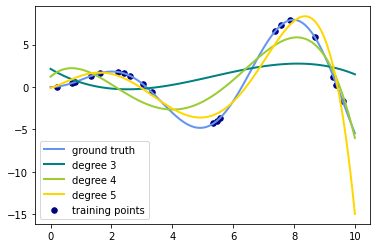

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

## Logistic Regression

Lets us see an example of how polynomial features can be used the enhance classification models produced by logistic regression.

Let us first generate a synthetic dataset with 200 examples. Each example belongs to one of two possible classes. So this is a binary classification dataset. By inspecting the generated plot below, you should conclude that this is a non-linearly separable dataset, that is, there is no straight line that can separate positive and negative examples.

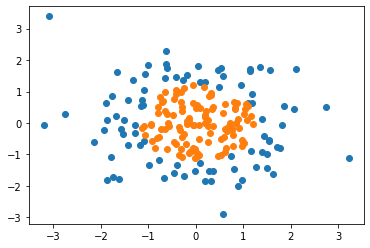

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

Now, we fit a vanilla logistic regression model to our toy dataset. After that, we plot the examples again, this time with the corresponding learned decision boundary.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


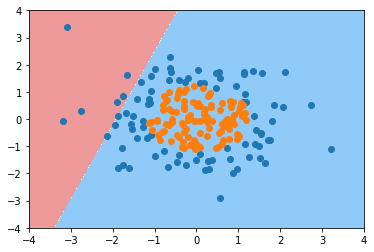

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.score(X, y)

 # Method of drawing decision boundary
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

You should notice that the decision boundary for the above model is not good at separating the positive and negative examples in our toy dataset. This is because logistic regression (without polynomial features) is only able to generate linear decision boundaries.

Let us now, extend our dataset with some polynomial features, and induce a another logistic regression model.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


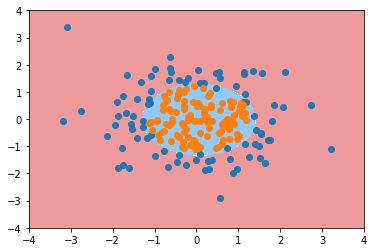

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Add a pipeline of polynomial terms for logistic regression
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

 # Use pipes to get objects
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)


poly_log_reg.score(X, y)

plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

Now, you should notice that the corresponding decision boundary separates the positive and negative examples very well. Furthermore, this decision boundary is not linear anymore.

In general, by adding polynomial features to train linear models, it is possible to generate arbitrarily complex decision surfaces.